# Возраст

У каждого животного и растения в модели присутствует возраст. Он зависит от количества шагов, в течении которых существует агент модели:



$$
A = \alpha \cdot t
$$

$A$ - возраст агента.

$t$ - количество шагов модели.

$\alpha$ - коэффициент, который определяет какому количеству шагов модели соответствует 1 год жизни агента и может отличатся у жертв, хищников и растений.

# Скорость 

На каждом ходу животное может двигаться с различной скоростью. Однако максимальная скорость ограничена и зависит от возраста животного:

$$
V_{max} = \beta \cdot V_0
$$

$V_{max}$ - максимальная скорость животного.


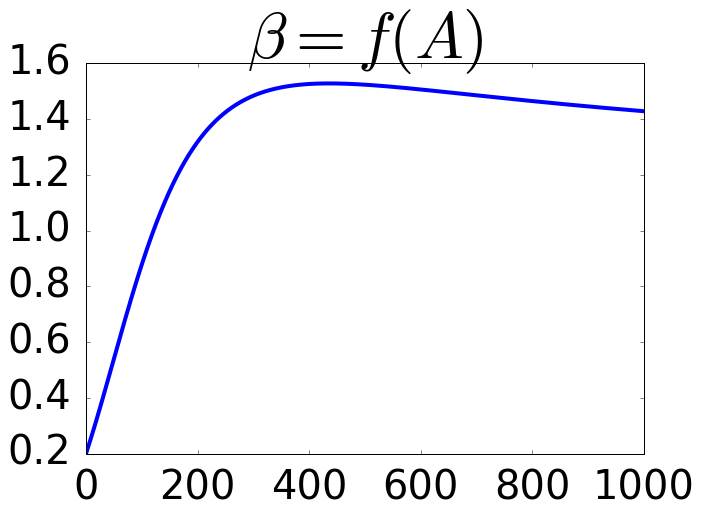

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def alpha_f(x):
    return ((x**2) + (2*x))/((x**2) + 2.3) + 0.2

t = np.arange(0, 1000)
alpha = alpha_f(np.linspace(0, 7, 1000))
plt.figure(figsize=(10, 7))
plt.plot(t, alpha, 'b', lw=4)
plt.title(r'$\beta = f(A)$', fontsize=65)
#plt.xlabel(r'$A$', fontsize=20, style='oblique')
#plt.ylabel(r'$\beta$', fontsize=20, style='oblique', rotation=0)
plt.tick_params(axis='both', which='major', pad=15)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.show()

$V_0$ - постоянная величина, определяющая общий уровень скорости агентов в модели.

$\beta$ - коэффициент, который зависит от возраста животного:

$$
\beta = f(A)
$$

Предполагается, что от рождения животного, т.е. момента появления его в модели, максимальная скорость будет увеличиваться, достигать максимального значения чуть раньше середины жизненного цикла животного и убывать к его концу с увеличением возраста. То, как может выглядеть такая зависимость проиллюстрировано на графике ниже.

# Энергия

У животных присутствует уровень жизненной энергии.




На каждом шагу модели текущий запас энергии изменяется:
$$
E = f(t)
$$

$$
E(t) = E(t-1) + \gamma \cdot E_f - \epsilon \cdot E_l - \zeta \cdot E_m
$$

$E(t)$ - значение энергии на текущем шаге модели.

$E(t-1)$ - значение энергии на предыдущем шаге.



$E_f$ - постоянное значение, соответствует энергии получаемой при поедании пищи.

$\gamma$ - коэффициент, условно обозначает питательность пищи, зависит от возраста добычи:

$$
\gamma = f(A)
$$

На разных этапах своей жизни животное обладает различной питательностью. Так растущий организм имеет небольшую питательность, по сранвнению со взрослым животным. После взросление питательность прекращает расти, убывает и некоторое время держится на одном уровне, после начинает убывать к старости. Примерная зависимость изображена ниже.

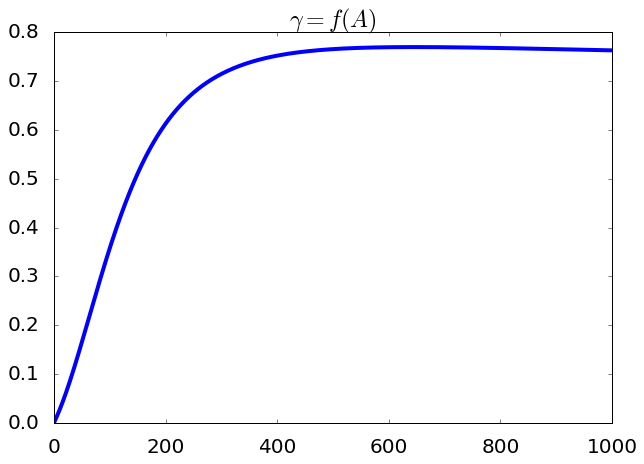

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def gamma_f(x):
    return ((5*x**2) + (5*x))/(7*((x**2)+3))

t = np.arange(0, 1000)
Gamma = gamma_f(np.linspace(0, 10, 1000))
plt.figure(figsize=(10, 7))
plt.plot(t, Gamma, 'b', lw=4)
plt.title(r'$\gamma = f(A)$', fontsize=24)
#plt.xlabel(r'$A$', fontsize=20, style='oblique')
#plt.ylabel(r'$\gamma$', fontsize=20, style='oblique', rotation=0)
plt.tick_params(axis='both', which='major', pad=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


$E_l$ - постоянное значение, обозначает ту часть энергии, которую животное тратит на поддержание жизнедеятельности в течении одного хода.

$\epsilon$ - коэффициент, зависит от возраста жертвы:

$$
\epsilon = f(A)
$$

На разных этапах своей жизни животное тратит различное количество энергии, для поддержание своей жизни. Так растущему организму требуется больше энергии на развитие, после взросление это значение прекращает расти, убывает и некоторое время держится на одном уровне, после начинает убывать к старости. Примерная зависимость изображена ниже.

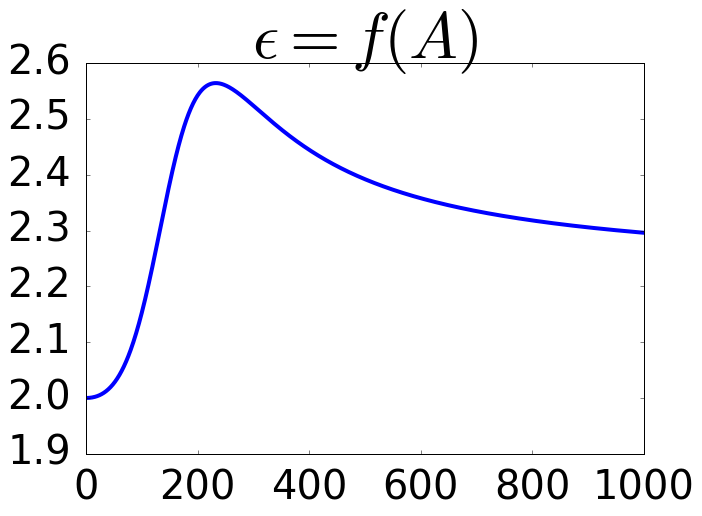

In [3]:
def epsilon_f(x):
    return (x**3)/((4.5*x**3) - (14*x**2) + 18*x - 0.1) + 2

t = np.arange(0, 1000)
epsilon = epsilon_f(np.linspace(0, 11, 1000))
plt.figure(figsize=(10, 7))
plt.plot(t, epsilon, 'b', lw=4)
plt.title(r'$\epsilon = f(A)$', fontsize=65)
#plt.xlabel(r'$A$', fontsize=24, style='oblique')
#plt.ylabel(r'$\epsilon$', fontsize=24, style='oblique', rotation=0)
plt.tick_params(axis='both', which='major', pad=15)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.show()
#TODO доделать

$E_m$ - энергия, которая тратится на передвижение.

$\zeta$ - коэффициент, линейно зависящий от пройденного расстояния животным за текущий ход:

$$
\zeta = a \cdot L
$$

Чем больше животное прошло, тем больше энергии оно потратило. График представлен ниже.

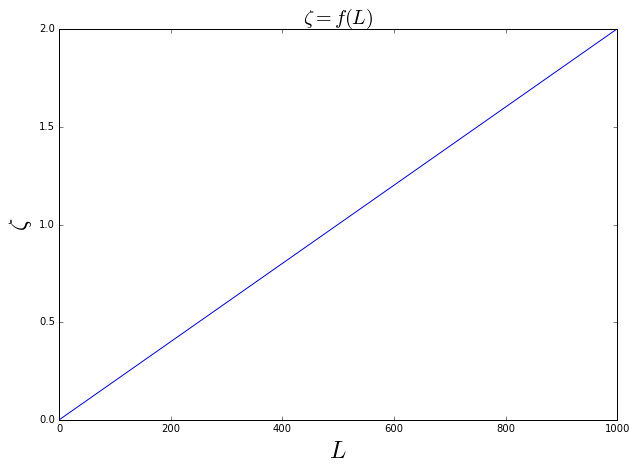

In [5]:
def zeta_f(x):
    return x * 0.2

t = np.arange(0, 1000)
zeta = zeta_f(np.linspace(0, 10, 1000))
plt.figure(figsize=(10, 7))
plt.plot(t, zeta, 'b')
plt.title(r'$\zeta = f(L)$', fontsize=20)
plt.xlabel(r'$L$', fontsize=24, style='oblique')
plt.ylabel(r'$\zeta$', fontsize=24, style='oblique')
plt.show()

Уровень энергии ограничен определенным значением, зависящим от возраста агента.

$$
E < E_{max} = \lambda \cdot E_0,
$$

$E$ - энергия животного. 

$E_0$ - постоянная, определяющий общий уровень запаса энергии в модели.

$\lambda$ - коэффициент, зависящий от возраста животного:

$$
\lambda = f(A)
$$

С момента рождения максимально возможный запас энергии у животного растет, достигает максимума в среднем возрасте и очень медленно уменьшается к старости. Примерная зависимость изображена на рисунке ниже.


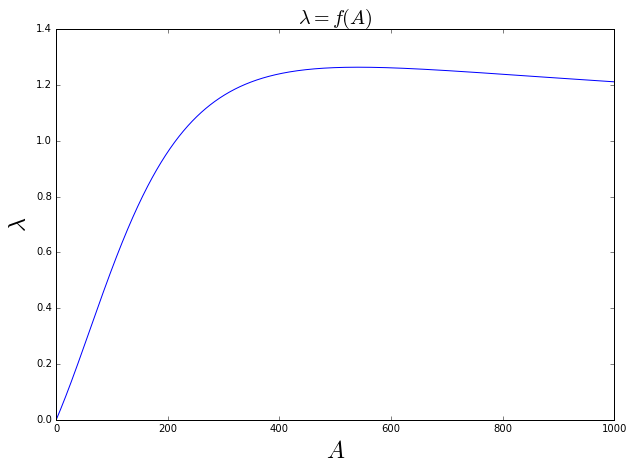

In [6]:
def lambda_f(x):
    return ((x**2) + (2*x))/((x**2) + 3)

t = np.arange(0, 1000)
Lambda = lambda_f(np.linspace(0, 7, 1000))
plt.figure(figsize=(10, 7))
plt.plot(t, Lambda, 'b')
plt.title(r'$\lambda = f(A)$', fontsize=20)
plt.xlabel(r'$A$', fontsize=24, style='oblique')
plt.ylabel(r'$\lambda$', fontsize=24, style='oblique')
plt.show()

# Запас сил

Также у каждого животного есть определенный запас физических сил, максимальное его значение можно назвать выносливостью.



Запас сил меняется с каждым ходом.

$$
S(t) = S(t-1) + \eta \cdot S_m
$$

$S(t)$ - запас сил на текущем ходу.

$S(t-1)$ - запас сил на предыдущем ходу.

$S_M$ - постоянное значение, которое соответствует запасу физических сил расходуемых на движение.

$\eta$ - коэффициент, зависит от расстояния пройденным хищником на текущем ходу и от его максимальной скорости:

$$
\eta = - c \cdot \frac{L}{V_{max}} + d
$$

Количество сил линейно зависит от пройденного пути. Однако при знчение пройденного пути меньше определенной величины, запас сил восстанавливается. График данной зависимости изображен ниже.


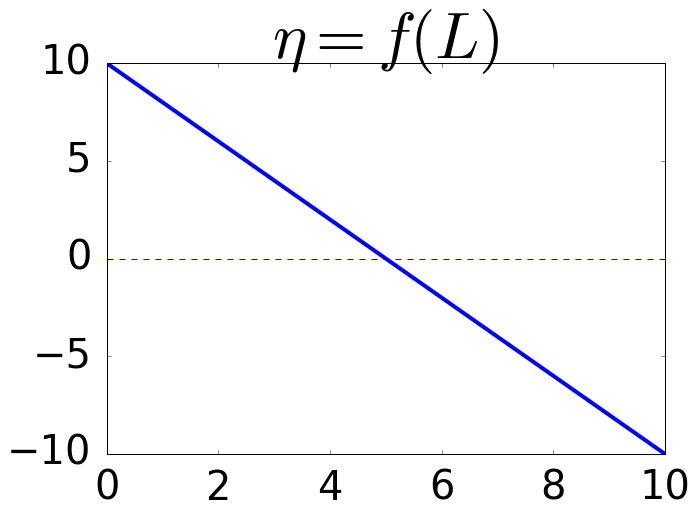

In [11]:
def eta_f(x):
    return (- 4 * x) + 10

t = np.arange(0, 11)
eta = eta_f(np.linspace(0, 5, 11))
plt.figure(figsize=(10, 7))
plt.plot(t, eta, 'b', lw=4)
plt.plot([0,10],[0,0], 'b--')
plt.title(r'$\eta = f(L)$', fontsize=65)
#plt.xlabel(r'$L$', fontsize=20, style='oblique')
#plt.ylabel(r'$\eta$', fontsize=20, style='oblique', rotation=0)
plt.tick_params(axis='both', which='major', pad=15)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.show()

Запас сил ограничен сверху значением, зависящим от количества энергии у животного:

$$
S < S_{max} = \theta \cdot S_0
$$

$S_0$ - постоянное значение, определяет запас сил у животных в модели.

$\theta \:$ - коэффициент, корректирующий текущию выносливость в соответствии с запасом энергии:

$$
\theta = 1 - e^{-\frac{3 \cdot E(t)}{E_{max}-E(t)}} 
$$

Выносливость практически не меняется при небольших отклонениях значения энергии, но при более значительном снижении уровня энергии выносливость начинает резко уменьшаться. Значительное снижении энергии происходит в том случае, если животное долго голодает. Такая зависимость позволяет моделировать физическое истощение агентов. График завсимости представлен ниже.


1.0


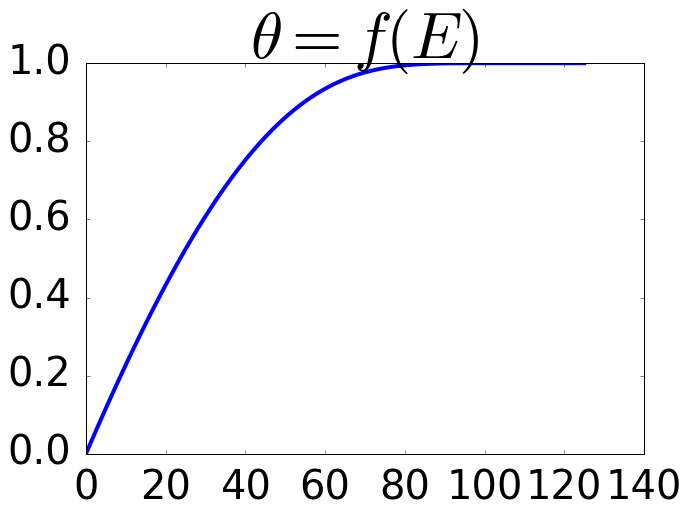

In [36]:
def theta_f(x, m):
    return 1 - np.exp((- 3 * x)/(m - x))

print(theta_f(125.0, 126))

t = np.arange(0, 126)
theta = theta_f(np.arange(126), 126)
plt.figure(figsize=(10, 7))
plt.plot(t, theta, 'b', lw=4)
plt.title(r'$\theta = f(E)$', fontsize=65)
#plt.xlabel(r'$E$', fontsize=24, style='oblique')
#plt.ylabel(r'$\theta$', fontsize=24, style='oblique')
plt.tick_params(axis='both', which='major', pad=15)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.show()